## 라이브러리 로드

In [ ]:
# 데이터 분석을 위한 pandas 라이브러리를 불러옵니다.
# 수치계산을 위한 numpy를 불러옵니다.
# 데이터 시각화를 위한 matplotlib, seaborn 을 불러옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
print(pd.__version__)
print(sns.__version__)

In [ ]:
# 0.11.0 버전에서 변화가 많으니 이 버전 이상을 사용해 주세요. 
# !pip install seaborn --upgrade

## 데이터셋 불러오기

In [ ]:
# mpg 데이터셋을 불러옵니다.
# df
df = sns.load_dataset('mpg')

## 데이터셋 일부만 가져오기

In [ ]:
# head


In [ ]:
# tail


## 요약하기

##  결측치 보기

## 기술통계

In [ ]:
# describe 를 통해 범주형 변수에 대한 기술통계를 보기


## 범주형 변수
### 범주형 데이터 유일값의 빈도수

In [ ]:
# nunique 값 구하기
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

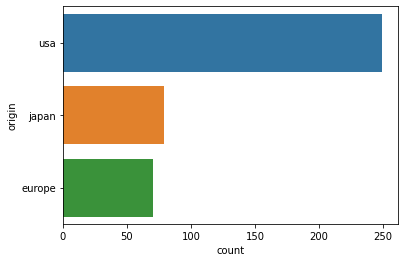

In [ ]:
# countplot 으로 origin 빈도수 시각화 하기
sns.countplot(data=df, y='origin')

### 1개 변수의 빈도수

In [ ]:
# origin 의 빈도수 구하기
df['origin'].value_counts()

usa       249
japan      79
europe     70
Name: origin, dtype: int64

### 2개 이상의 변수에 대한 빈도수

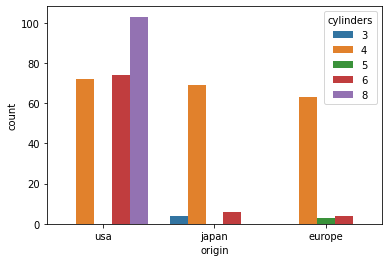

In [ ]:
# countplot 으로 origin 의 빈도수를 시각화 하고 cylinders 로 다른 색상으로 표현하기
sns.countplot(data=df, x='origin', hue='cylinders')

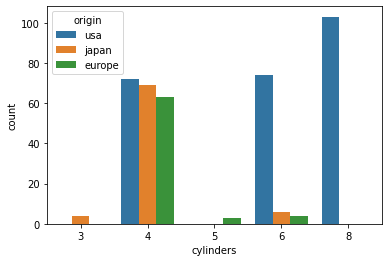

In [ ]:
# countplot 으로 cylinders 의 빈도수를 시각화 하고 origin 으로 다른 색상으로 표현하기
sns.countplot(data=df, x='cylinders', hue='origin')

In [ ]:
# pd.crosstab 으로 시각화한 값 직접 구하기
pd.crosstab(df['origin'], df['cylinders'])

cylinders,3,4,5,6,8
origin,,,,,
europe,0,63,3,4,0
japan,4,69,0,6,0
usa,0,72,0,74,103


### 범주형 vs 수치형 변수

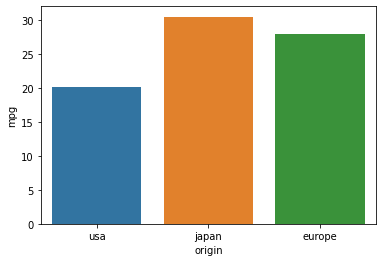

In [ ]:
# barplot 으로 origin 별 mpg 값 구하기
sns.barplot(data=df, x='origin', y='mpg', ci=None)

### groupby 를 통한 연산

In [ ]:
# groupby를 통해 origin 별로 그룹화 하고 mpg 의 평균 구하기
df.groupby('origin')['mpg'].mean()

origin
europe    27.891429
japan     30.450633
usa       20.083534
Name: mpg, dtype: float64

### pivot table을 통한 연산

In [ ]:
# pivot_table 로 같은 값 구하기
pd.pivot_table(data=df, index='origin', values='mpg')

,mpg
origin,
europe,27.891429
japan,30.450633
usa,20.083534


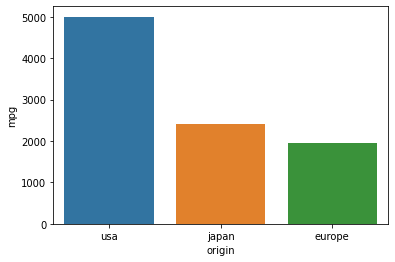

In [ ]:
# barplot 으로 합계 값 구하기
sns.barplot(data=df, x='origin', y='mpg', estimator=np.sum, ci=None)

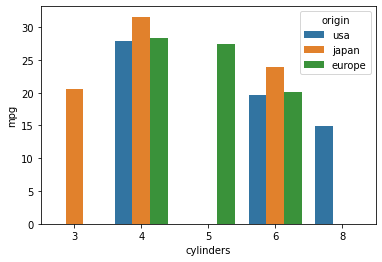

In [ ]:
# barplot 에 hue 를 사용하여 색상을 다르게 표현해 보기
sns.barplot(data=df, x='cylinders', y='mpg', ci=None, hue='origin')

In [ ]:
# groupby 를 통해 위 시각화에 대한 값을 구하기
df.groupby(['cylinders', 'origin'],)['mpg'].mean().unstack()

origin,europe,japan,usa
cylinders,,,
3,NaN,20.550000,NaN
4,28.411111,31.595652,27.840278
5,27.366667,NaN,NaN
6,20.100000,23.883333,19.663514
8,NaN,NaN,14.963107


In [ ]:
# pivot_table 를 통해 위 시각화에 대한 값을 구하기
pd.pivot_table(data=df, index='cylinders', columns='origin', values='mpg')

origin,europe,japan,usa
cylinders,,,
3,NaN,20.550000,NaN
4,28.411111,31.595652,27.840278
5,27.366667,NaN,NaN
6,20.100000,23.883333,19.663514
8,NaN,NaN,14.963107


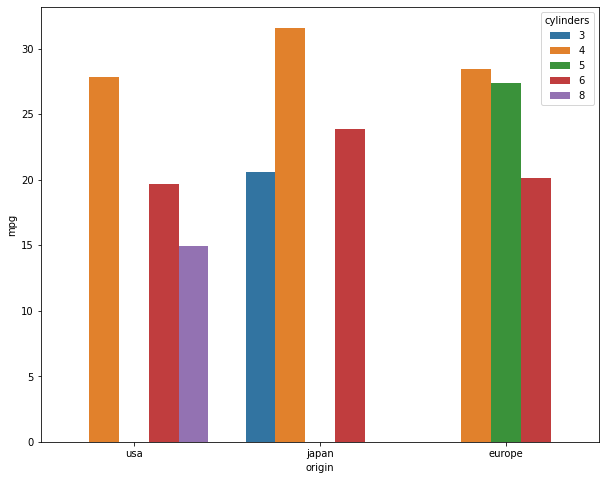

In [ ]:
# cylinders 와 mpg 의 x, hue 값을 변경해서 시각화
plt.figure(figsize=(10, 8))
sns.barplot(data=df, x='origin', y='mpg', hue='cylinders', ci=None)

### boxplot과 사분위수

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/1280px-Boxplot_vs_PDF.svg.png" width="300">

이미지 출처 : https://en.wikipedia.org/wiki/Box_plot

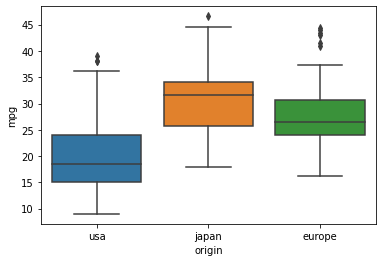

In [ ]:
# boxplot 으로 origin 별 mpg 의 기술통계 값 구하기
sns.boxplot(data=df, x='origin', y='mpg')

In [ ]:
# groupby로 origin 값에 따른 mpg의 기술통계 구하기
# 결과를 변수에 할당하여 재사용하기
origin_desc = df.groupby('origin')['mpg'].describe()

### 박스플롯 이해하기
* https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC

In [ ]:
europe = origin_desc.loc['europe']
europe

count    70.000000
mean     27.891429
std       6.723930
min      16.200000
25%      24.000000
50%      26.500000
75%      30.650000
max      44.300000
Name: europe, dtype: float64

In [ ]:
# IQR, 이상치를 제외한 최댓값, 최솟값 구하기
Q3 = europe['75%']
Q1 = europe['25%']
IQR = Q3 - Q1
OUT_MAX = Q3 + (1.5 * IQR)
OUT_MIN = Q1 - (1.5 * IQR)
OUT_MAX, OUT_MIN

(40.625, 14.025000000000002)

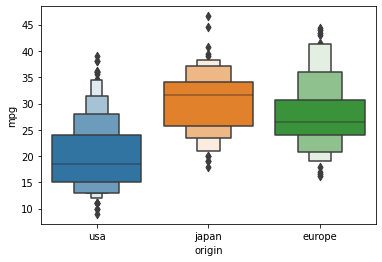

In [ ]:
# boxenplot 그리기
sns.boxenplot(data=df, x='origin', y='mpg')

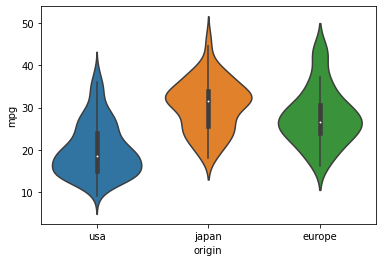

In [ ]:
# violinplot 그리기
sns.violinplot(data=df, x='origin', y='mpg')

### 산점도를 통한 범주형 데이터 표현

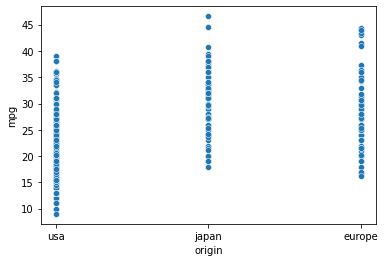

In [ ]:
# scatterplot 으로 범주형 변수 그리기
sns.scatterplot(data=df, x='origin', y='mpg')

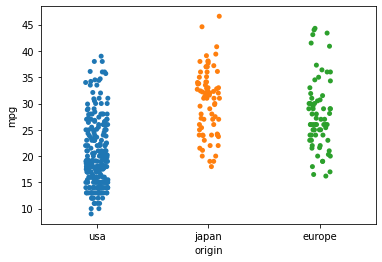

In [ ]:
# stripplot
sns.stripplot(data=df, x='origin', y='mpg')

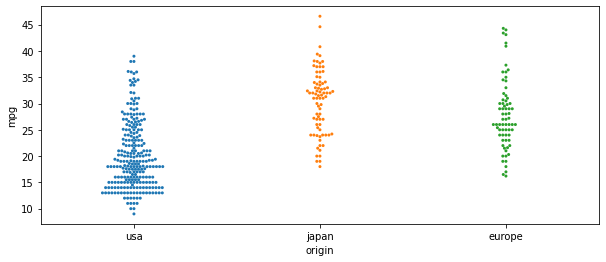

In [ ]:
# swarmplot
plt.figure(figsize=(10,4))
sns.swarmplot(data=df, x='origin', y='mpg', size=3)

### catplot을 통한 범주형 데이터의 서브플롯 시각화
<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png" width="500">

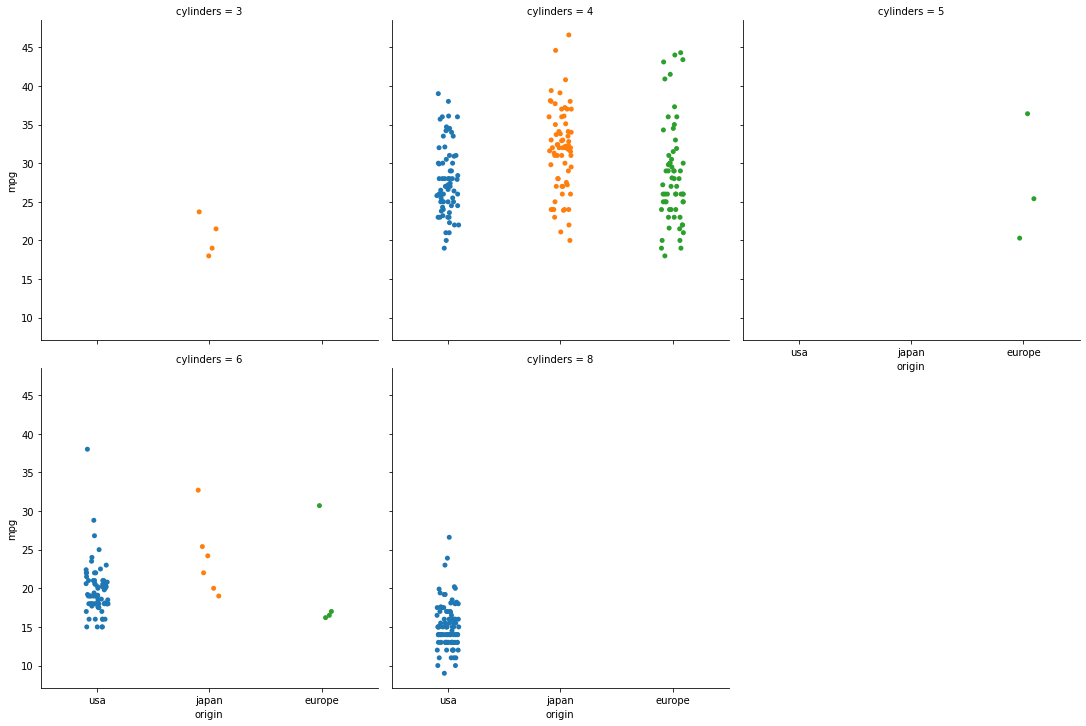

In [ ]:
# catplot
sns.catplot(data=df, x='origin', y='mpg', col='cylinders', col_wrap=3)

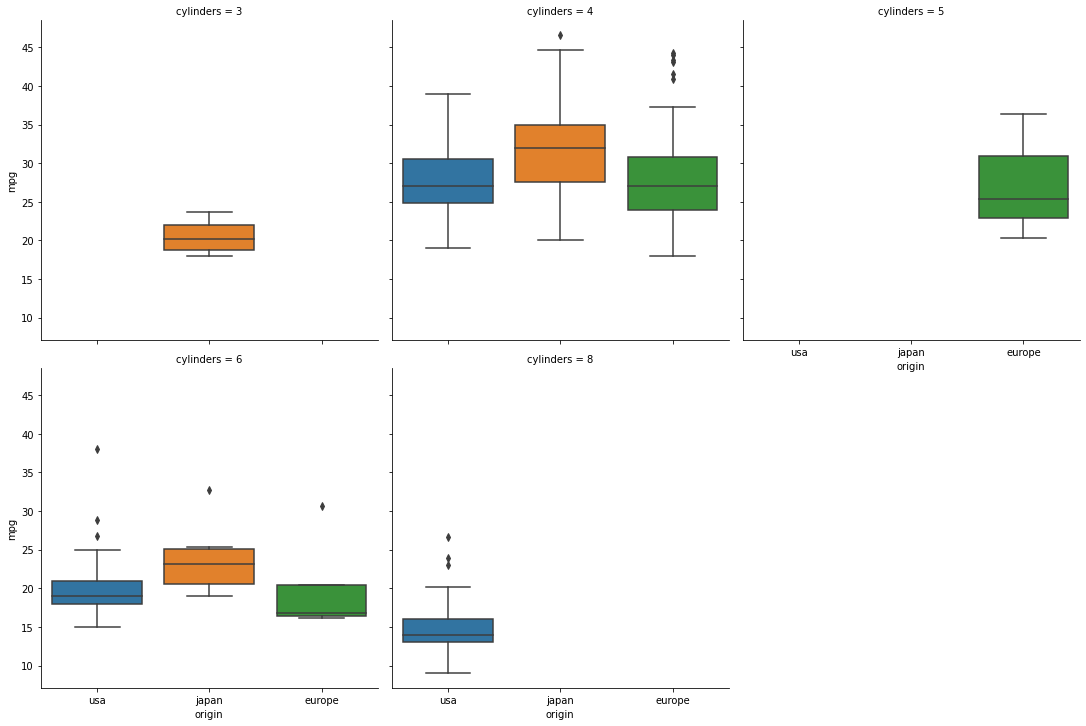

In [ ]:
# catplot 으로 boxplot그리기
sns.catplot(data=df, x='origin', y='mpg', col='cylinders', col_wrap=3, kind='box')

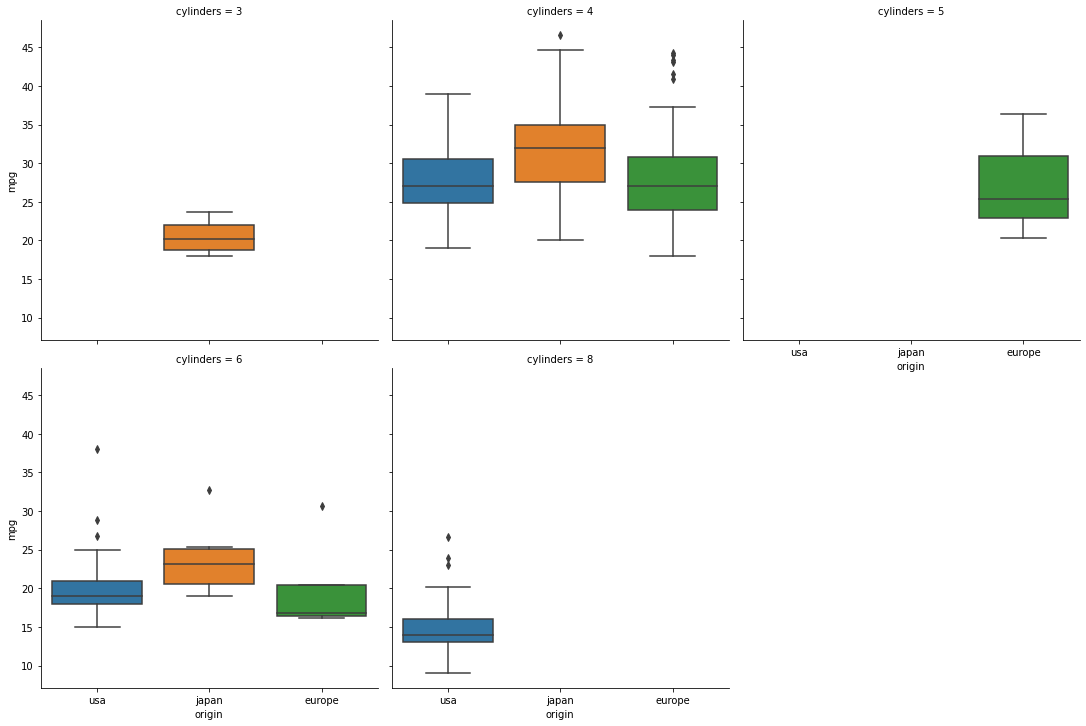

In [ ]:
# catplot 으로 boxplot그리기
sns.catplot(data=df, x='origin', y='mpg', col='cylinders', col_wrap=3, kind='box')

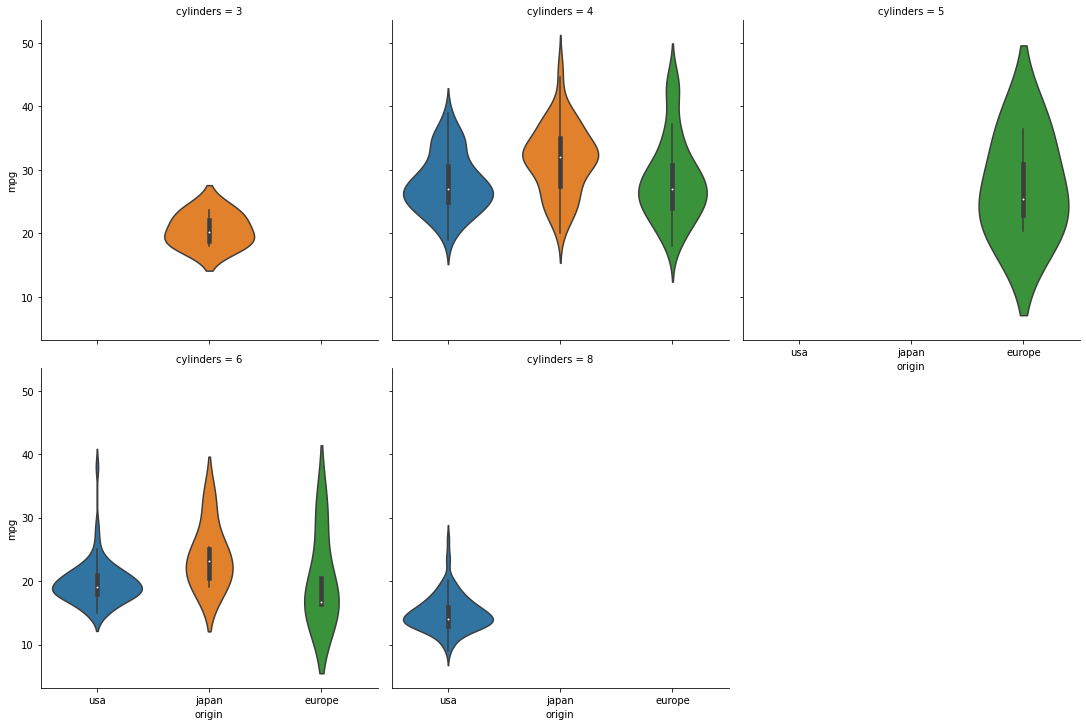

In [ ]:
# catplot 으로 violinplot그리기
sns.catplot(data=df, x='origin', y='mpg', col='cylinders', col_wrap=3, kind='violin')

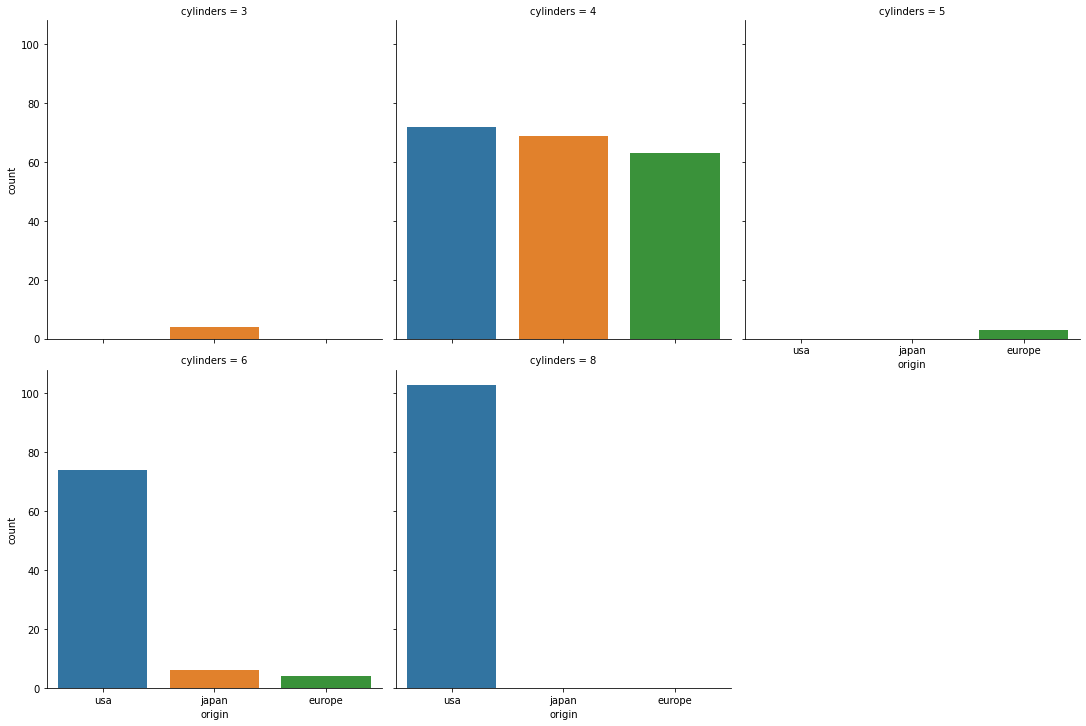

In [ ]:
# catplot 으로 countplot그리기
# count 는 x 나 y 중 하나만 들어가야함
sns.catplot(data=df, x='origin',  col='cylinders', col_wrap=3, kind='count')

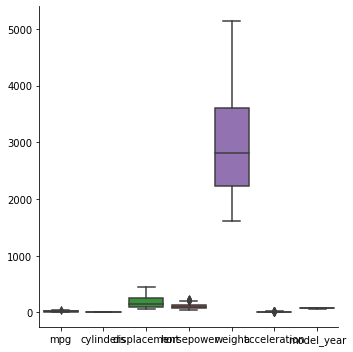

In [ ]:
# catplot 으로 boxplot그리기
# df 전체를 넣고 시각화 하기
sns.catplot(data=df, kind='box', aspect=1)

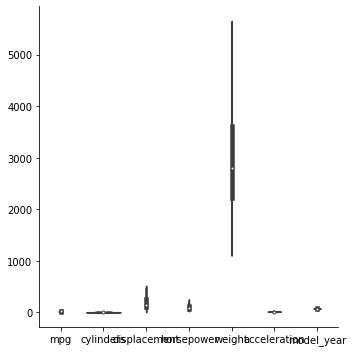

In [ ]:
# catplot 으로 violinplot그리기
# df 전체를 넣고 시각화 하기
sns.catplot(data=df, kind='violin', aspect=3)